<img src = "https://ieee-dataport.org/sites/default/files/coronavirus-dataset-1.png">
<img src = "https://media.giphy.com/media/6h8jgwC3dU6vS/giphy.gif">

In [1]:
!pip install dexplot 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pycaret 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install stylecloud 

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [5]:
#For uploading and accessing the data
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for visualizations
plt.style.use('ggplot')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler

import ydata_profiling

import dexplot as dxp


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Nltk for tokenize and stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import requests
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS
import stylecloud
from wordcloud import ImageColorGenerator
RANDOM_SEED = 42


# <a id='1'> Detailed Analysis for Tweets in COVID Pandemic</a>

In [6]:
df = pd.read_csv('kaggle/input/covid19-tweets/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

def duplicated_values_data(data):
    dup=[]
    columns=data.columns
    for i in data.columns:
        dup.append(sum(data[i].duplicated()))
    return pd.concat([pd.Series(columns),pd.Series(dup)],axis=1,keys=['Columns','Duplicate count'])

def unique_values_in_column(data,feature):
    unique_val=pd.Series(data.loc[:,feature].unique())
    return pd.concat([unique_val],axis=1,keys=['Unique Values'])

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

def ngrams_top(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df



In [8]:
missing_value_of_data(df)

,Total,Percentage
hashtags,42208,28.60
user_location,29990,20.32
user_description,8365,5.67
source,48,0.03
user_name,0,0.00
user_created,0,0.00
user_followers,0,0.00
user_friends,0,0.00
user_favourites,0,0.00
user_verified,0,0.00


In [9]:
duplicated_values_data(df)

,Columns,Duplicate count
0,user_name,68633
1,user_location,124045
2,user_description,71720
3,user_created,67418
4,user_followers,122864
5,user_friends,137539
6,user_favourites,116317
7,user_verified,147599
8,date,36075
9,text,327


In [10]:
count_values_in_column(df,'user_location')

,Total,Percentage
NaN,29990,20.32
India,3117,2.11
United States,1991,1.35
"New Delhi, India",1447,0.98
"Mumbai, India",1136,0.77
...,...,...
NYC Not-for-Profit I 🚫No DMs!,1,0.00
Kitchen,1,0.00
"Bonnyville, AB",1,0.00
"New England, USA",1,0.00


In [11]:
count_values_in_column(df,'hashtags')

,Total,Percentage
NaN,42208,28.60
['COVID19'],31057,21.04
['Covid19'],4097,2.78
['covid19'],2554,1.73
"['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']",481,0.33
...,...,...
['publicsector'],1,0.00
['Eskom'],1,0.00
['Hospitalist'],1,0.00
"['Republicans', 'Trump']",1,0.00


In [12]:
dd_11 = ngrams_top(df['text'],(1,1),n=10)
dxp.bar(x='text', y='count', data=dd_11,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

<Figure size 1440x720 with 1 Axes>

In [13]:
dd_22 = ngrams_top(df['text'],(2,2),n=10)
dxp.bar(x='text', y='count', data=dd_22,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

<Figure size 1440x720 with 1 Axes>

In [14]:
dd_33 = ngrams_top(df['text'],(3,3),n=10)
dxp.bar(x='text', y='count', data=dd_33,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

<Figure size 1440x720 with 1 Axes>

In [15]:
Top10_source = pd.DataFrame(df['source'].value_counts().sort_values(ascending=False)[:10]).reset_index()
Top10_source.columns = ['Source','Count']

In [16]:
dxp.bar(x='Source', y='Count', data=Top10_source,figsize=(10,5),cmap='viridis',title='Source for Tweets in COVID-19')

<Figure size 1440x720 with 1 Axes>

#### Inference-
* Twitter Web app has most tweets followed by Twitter for Android and Iphone

In [17]:
best_10_regions = pd.DataFrame(df['user_location'].value_counts().sort_values(ascending=False)[:15]).reset_index()
best_10_regions.columns = ['user_location','Count']

In [18]:
dxp.bar(x='user_location', y='Count', data=best_10_regions,figsize=(15,5),cmap='viridis',title='Geographical Location for Tweets')

<Figure size 2160x720 with 1 Axes>

#### Inference-
* India dominates in Tweets for COVID -19 followed by US.

In [19]:
Top10_user = pd.DataFrame(df['user_name'].value_counts().sort_values(ascending=False)[:10]).reset_index()
Top10_user.columns = ['user_name','count']

In [20]:
dxp.bar(x='user_name', y='count', data=Top10_user,figsize=(15,5),cmap='viridis',title='Users Dominating in Tweets in COVID-19')

<Figure size 2160x720 with 1 Axes>

In [21]:
dxp.bar(x='user_verified', y='user_followers', data=df.head(100),figsize=(10,10),split='source',aggfunc='mean',title='Relationship betwwen fake and real users')

C:\Users\hannah.kim\AppData\Roaming\Python\Python39\site-packages\dexplot\_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



<Figure size 1440x1440 with 1 Axes>

In [22]:
hashtags = df['hashtags'].dropna().tolist()
unique_hashtags=(" ").join(hashtags)
stylecloud.gen_stylecloud(text = unique_hashtags,
                          icon_name='fas fa-first-aid',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')


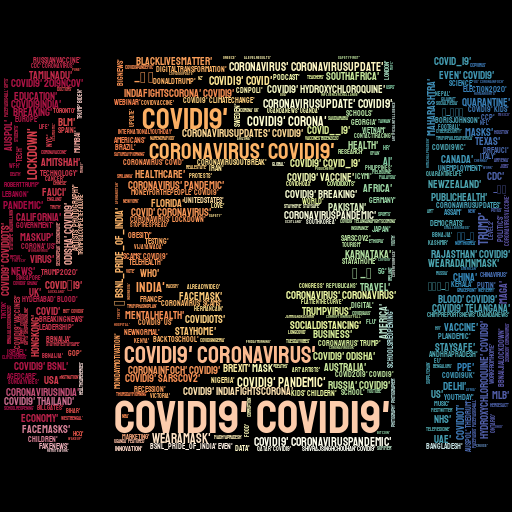

In [23]:
from IPython.display import Image 

Image("./stylecloud.png",width = 600, height = 600)

In [24]:
hashtags = df['text'].dropna().tolist()
unique_hashtags=(" ").join(hashtags)
stylecloud.gen_stylecloud(text = unique_hashtags,
                          icon_name='far fa-comment',
                          background_color='white',
                          gradient='horizontal')


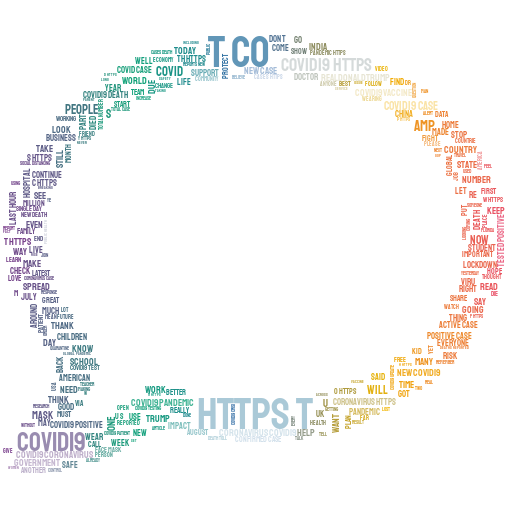

In [25]:
from IPython.display import Image 

Image("./stylecloud.png",width = 600, height = 600)

In [26]:
df_plot = df[['user_created','user_followers','user_favourites','user_friends']]
df_plot['user_created'] = pd.to_datetime(df_plot.user_created)
df_plot['user_created'] = df_plot['user_created'].dt.strftime('%m/%d/%Y')
df_plot = df_plot.sort_values('user_created')

In [27]:
dxp.line(x='user_created',y = 'user_followers',aggfunc='mean',data=df_plot.head(100),figsize=(10,5),cmap='viridis',title='Followers Timeline')

C:\Users\hannah.kim\AppData\Roaming\Python\Python39\site-packages\dexplot\_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



<Figure size 1440x720 with 1 Axes>

In [28]:
dxp.line(x='user_created',y = 'user_favourites',aggfunc='mean',data=df_plot.head(100),figsize=(10,5),cmap='viridis_r',title='User Favourite Timeline')

C:\Users\hannah.kim\AppData\Roaming\Python\Python39\site-packages\dexplot\_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



<Figure size 1440x720 with 1 Axes>

In [29]:
dxp.line(x='user_created',y = 'user_friends',aggfunc='mean',data=df_plot.head(100),figsize=(10,5),cmap='plotly3',title='User Friends Timeline')

C:\Users\hannah.kim\AppData\Roaming\Python\Python39\site-packages\dexplot\_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



<Figure size 1440x720 with 1 Axes>

# <a id='1'> Topic Modeling with PyCaret</a><br>
<img src = 'https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png'> <br>

###### PyCaret is an open source low-code machine learning library in Python that aims to reduce the hypothesis to insights cycle time in a ML experiment. It enables data scientists to perform end-to-end experiments quickly and efficiently. In comparison with the other open source machine learning libraries, PyCaret is an alternative low-code library that can be used to perform complex machine learning tasks with only few lines of code. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy and many more.

###### PyCaret is a great library which not only simplifies the machine learning tasks for citizen data scientists but also helps new startups to reduce the cost of investing in a team of data scientists. Therefore, this library has not only helped the citizen data scientists but has also helped individuals who want to start exploring the field of data science, having no prior knowledge in this field.

###### PyCaret is simple, easy to use and deployment ready. All the steps performed in a ML experiment can be reproduced using a pipeline that is automatically developed and orchestrated in PyCaret as you progress through the experiment. A pipeline can be saved in a binary file format that is transferable across environments.

In [30]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable



In [31]:
from pycaret.nlp import *

ModuleNotFoundError: No module named 'pycaret.nlp'

<b> This function initializes the environment in pycaret. setup() must called before executing any other function in pycaret. It takes one mandatory parameter: dataframe {array-like, sparse matrix} or object of type list. If a dataframe is passed, target column containing text must be specified. When data passed is of type list, no target parameter is required.<b>

In [35]:
pycaret. setup()

NameError: name 'pycaret' is not defined

In [ ]:
nlp1 = setup(df, target = 'text', session_id=RANDOM_SEED, experiment_name='covid')

In [ ]:
models()

<b> This function creates a model on the dataset passed as a data param during the setup stage. setup() function must be called before using create_model(). This function returns a trained model object.  </b>



In [ ]:
#Latent Dirichlet Allocation
lda = create_model('lda',multi_core=True)

In [ ]:
#Non-Negative Matrix Factorization
nmf = create_model('nmf', num_topics = 6)

In [ ]:
#Latent Semantic Indexing
lsi = create_model('lsi', num_topics = 6)

In [ ]:
#Hierarchical Dirichlet Process
hdp = create_model('hdp', num_topics = 6)

In [ ]:
#Random Projections
rp = create_model('rp',num_topics = 6)

<b> This function assigns each of the data point in the dataset passed during setup stage to one of the topic using trained model object passed as model param. create_model() function must be called before using assign_model(). This function returns data frame with topic weights, dominant topic and % of the dominant topic (where applicable). <b>



In [ ]:
lda_results = assign_model(lda)
lda_results.head()

In [ ]:
nmf_results = assign_model(nmf)
nmf_results.head()

In [ ]:
hdp_results = assign_model(hdp)
hdp_results.head()

<b> This function takes a trained model object (optional) and returns a plot based on the inferred dataset by internally calling assign_model before generating a plot </b>

##### Plotting LDA Results(Word Frequency Distribution)

In [ ]:
plot_model(lda)

##### Plotting Word Distribution

In [ ]:
plot_model(lda, plot = 'distribution')

###### Plotting Bigrams

In [ ]:
plot_model(lda, plot = 'bigram')

###### Plotting Trigrams

In [ ]:
plot_model(lda, plot = 'trigram')

##### Plotting tsne 3D Dimension Plot

In [ ]:
plot_model(lda, plot = 'tsne')

###### Plotting Topic Distribution

In [ ]:
plot_model(lda, plot = 'topic_distribution')

###### Plotting WordCloud

In [ ]:
plot_model(lda, plot = 'wordcloud')

##### Plotting UMAP Dimensionality Plot

In [ ]:
plot_model(lda, plot = 'umap')

<b> This function displays the user interface for all the available plots for a given model. It internally uses the plot_model() function.<b/>



In [ ]:
evaluate_model(lda)

# <a id='1'> References</a>
* [Pycaret](https://github.com/pycaret/pycaret)
* [Helper Functions Notebook](https://www.kaggle.com/raenish/cheatsheet-text-helper-functions)

## Made with ❤️ for Learning 